# **Distribution Transformer Theory**
> A distribution transformer is also known as a typical kind of isolation transformer. The main function of this transformer is to alter the high voltage to the normal voltage like 240/120 V to use in electric power distribution. In the distribution system, there are different kinds of transformers available like single phase, 3-phase, underground, pad-mounted, pole-mounted transformer.
- Generally, these transformers are available in different sizes with efficiencies along with insulating oil.
- There are four types of distribution transformer connections available like star-star, delta-delta, star-delta, delta-star and Zig Zag/delta zigzag.

> Transformers plays a very important role in the power system. Though they are some of the most reliable component of the electrical grid they are also prone to failure due to many factors both internal or external. There could be many initiators which cause a transformer failure, but those which can potentially lead to catastrophic failure are the following:
1. Mechanical
2.   Dieletric Failure
3.   Electrical Winding Short-circuit








# Dataset Parameters Overview

- OTI- Oil Temperature Indicator
- WTI- Winding Temperature Indicator
- ATI- Ambient Temperature Indicator
- OLI- Oil Level Indicator
- OTIA- Oil Temperature Indicator Alarm OTIT
- Oil Temperature Indicator Trip
- MOG_A- Magnetic oil gauge indicator

# Objectives


*   Dataset exploration using various types of data visualization.
*   Build various Machine Learning models that can predict the Magnetic oil gauge fault indicator.

# Steps


1.   Import the libraries.
2.   Exploratory Data Analysis (EDA).
3.   Merge and clean the datasets.
4.   Data Visualization.
5.   Train-test split and data normalization.
6.   Implementing Machine Learning Models.
7.   Evaluation and comparison of the models.





# **Importing Libraries**


In [7]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set_theme(context='notebook', style='white', palette='deep', font_scale=1.5, color_codes=True)

# Set Matplotlib figure size and background color
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.facecolor'] = '#F0F8FF'

# Set Matplotlib title size
plt.rcParams['axes.titlesize'] = 25

# Set Matplotlib axis and label properties
plt.rcParams['axes.edgecolor'] = 'pink'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 20

# Set Matplotlib tick properties
plt.rcParams['xtick.color'] = '#A52A2A'
plt.rcParams['ytick.color'] = '#A52A2A'

# Set Matplotlib grid properties
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5
plt.rcParams['grid.alpha'] = 0.3

# Set Matplotlib legend properties
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.facecolor'] = 'NavajoWhite'
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20

# Set font size
plt.rcParams['font.size'] = 14

# Set figure DPI and edge color
plt.rcParams['figure.dpi'] = 50
plt.rcParams['figure.edgecolor'] = 'Blue'

pd.set_option('display.max_columns',None)


# **Exploratory Data Analysis**

In [8]:
tf = pd.read_csv('Overview.csv')

# convert to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

display(tf.shape)
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [9]:
cv = pd.read_csv('CurrentVoltage.csv')

# convert to datetime datatype
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

display(cv.shape)
cv.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# merge the datasets

cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'],format = '%Y-%m-%d %H:%M:%S')
transformer = pd.merge(tf, cv, on='DeviceTimeStamp')
transformer.sample(5)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
15816,2020-02-01 08:45:00,21.0,1.0,19.0,100.0,0.0,0.0,0.0,246.9,246.2,246.1,60.5,29.6,40.9,427.5,425.7,427.6,27.2
11738,2019-11-08 20:23:00,24.0,0.0,25.0,72.0,0.0,0.0,0.0,242.4,240.2,241.0,115.8,110.1,113.8,418.5,416.7,419.7,5.4
207,2019-06-27 13:12:00,34.0,0.0,34.0,39.0,0.0,0.0,0.0,241.1,241.2,241.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7535,2019-09-13 15:45:00,33.0,0.0,30.0,43.0,0.0,0.0,0.0,232.9,233.6,234.1,129.9,102.0,125.4,402.7,405.4,403.3,24.8
10722,2019-10-28 10:45:00,29.0,0.0,28.0,75.0,0.0,0.0,0.0,244.2,242.7,239.1,57.2,45.7,74.7,420.2,417.8,419.9,24.2


# **Data Visualization**

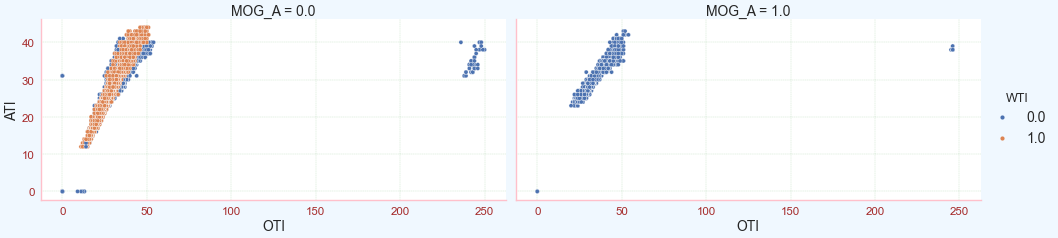

In [11]:
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A", aspect=2);

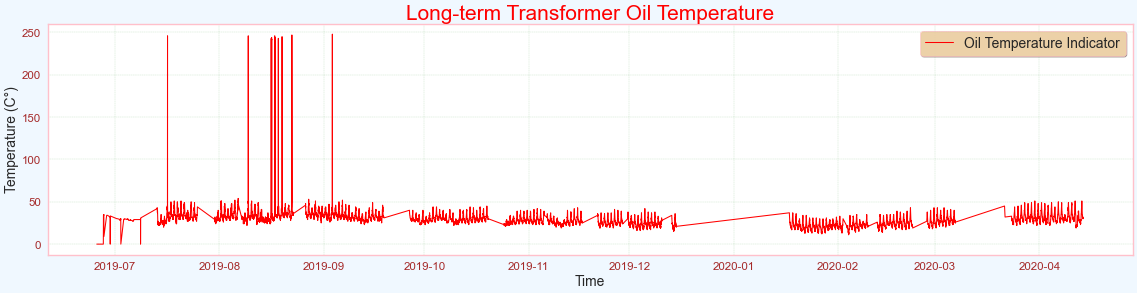

In [12]:
plt.figure(figsize=(28,6))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term Transformer Oil Temperature",fontsize= 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show()

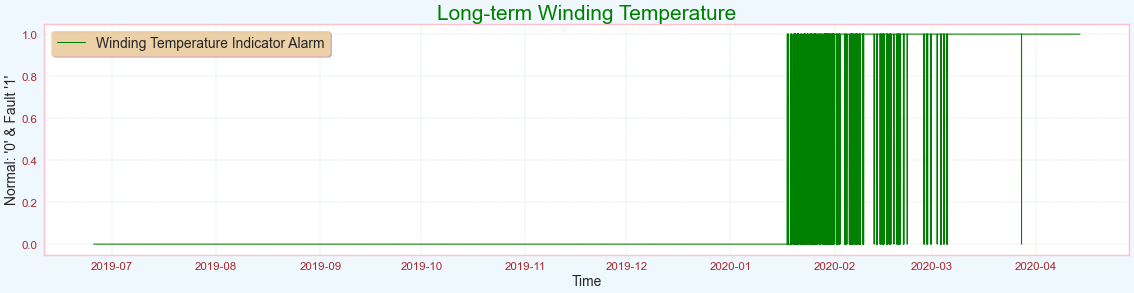

In [13]:
plt.figure(figsize=(28,6))

plt.plot(transformer.DeviceTimeStamp, transformer.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

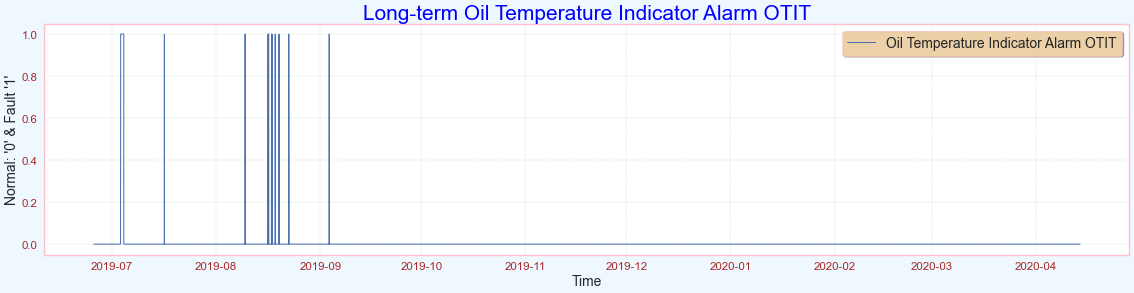

In [14]:
plt.figure(figsize=(28, 6))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

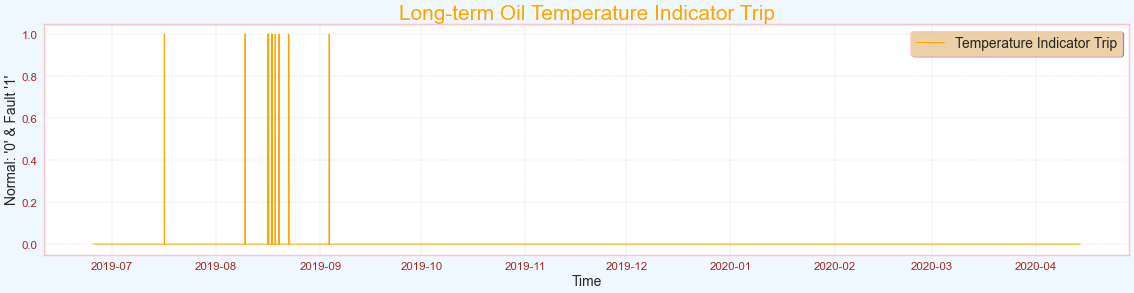

In [15]:
plt.figure(figsize=(28, 6))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show()

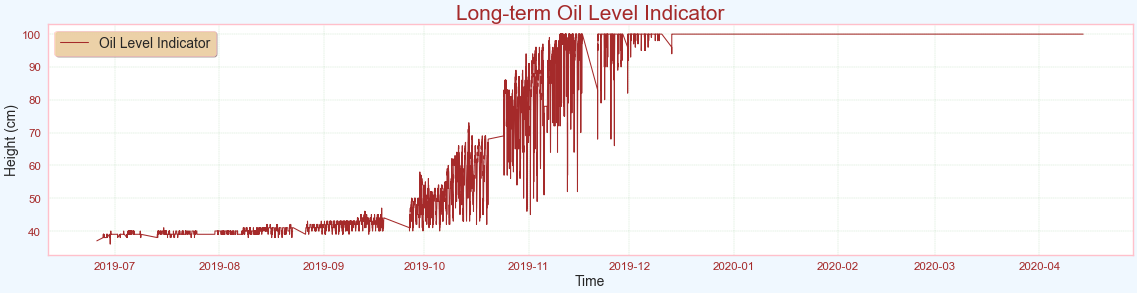

In [16]:
plt.figure(figsize=(28, 6))
plt.plot(transformer.DeviceTimeStamp, transformer.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show()

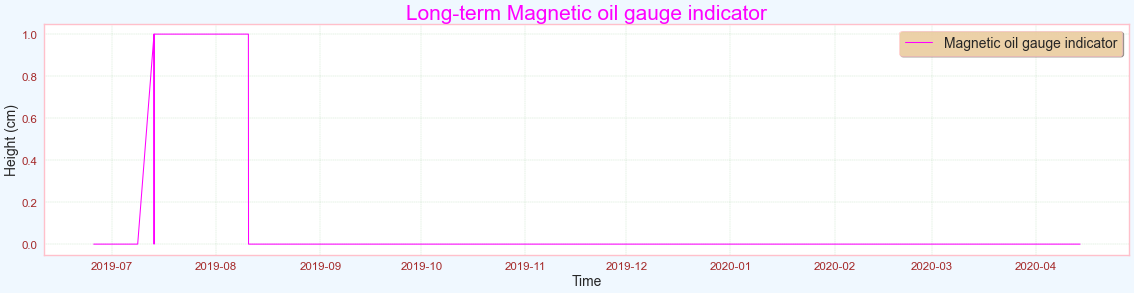

In [17]:
plt.figure(figsize=(28,6))

plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A, label="Magnetic oil gauge indicator",color='Magenta')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='Magenta')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show()

C:\Users\devaa\AppData\Local\Temp\ipykernel_9860\1422285241.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')


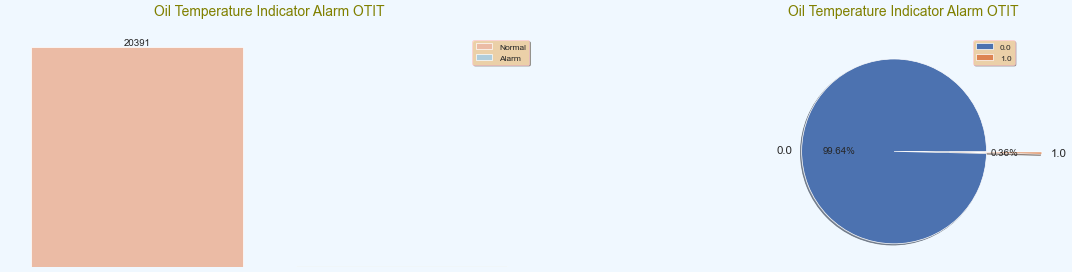

In [18]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(30, 6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',pad= 30);
plt.legend()
plt.axis('off');

C:\Users\devaa\AppData\Local\Temp\ipykernel_9860\2456791932.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')


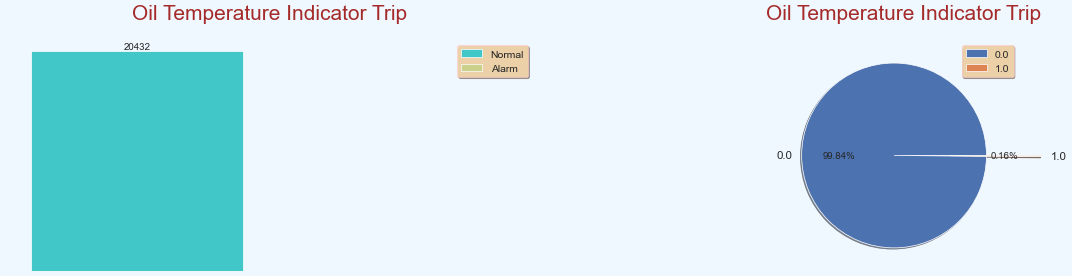

In [19]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(30,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',pad= 30);
plt.legend()
plt.axis('off');

C:\Users\devaa\AppData\Local\Temp\ipykernel_9860\2421008494.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')


(-1.25, 1.25, -1.25, 1.25)

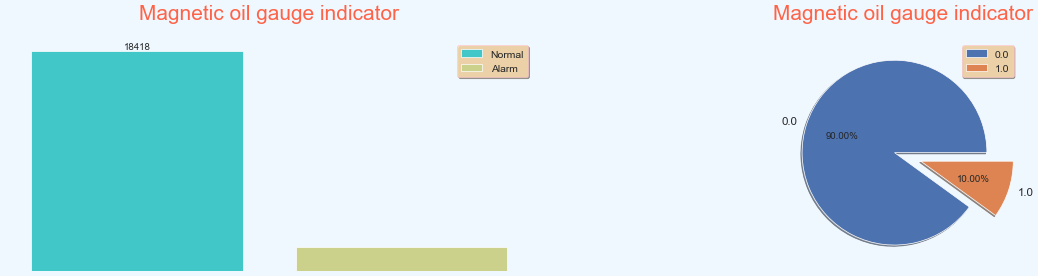

In [20]:
plt.figure(figsize=(30,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',pad= 30);
plt.legend()
plt.axis('off')

## **Train-test split and data normalization**

In [21]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1)
y = transformer['MOG_A']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ModuleNotFoundError: No module named 'sklearn'

## **Implementing Machine Learning Models**



# **1. Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


# Define a custom colormap with varied colors
cmap = ListedColormap(['#0071C5', '#4EA2F2', '#A4C8FD', '#CDE3FD'])



logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=cmap)
plt.title('Confusion Matrix')
plt.show()

import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logreg, file)


# **2. Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with varied colors
cmap = ListedColormap(['#FFA500', '#FFD700', '#FFA07A', '#FF4500'])


# Create and fit the SVM model
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_svc)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc.classes_)
disp.plot(cmap=cmap)
plt.title('Confusion Matrix (SVM)')
plt.show()

with open('svc_model.pkl', 'wb') as file:
    pickle.dump(svc, file)

#  **3. KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with pink colors
cmap_pink = ListedColormap(['#FFC0CB', '#FF69B4', '#FF1493', '#DB7093'])

# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# Display the confusion matrix with a pink color scheme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=cmap_pink)
plt.title('Confusion Matrix (KNN)')
plt.show()

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)


# **Evaluating and Comparing different models**

In [ ]:
models = pd.DataFrame({
    'Training Accuracy': [log_train, svc_train, knn_train],
    'Model Accuracy Score': [log_accuracy, svc_accuracy, knn_accuracy]
}, index=['Logistic Regression', 'Support Vector Machines', 'K Nearest Neighbours'])

In [ ]:
models = pd.DataFrame({
    'Training Accuracy': [log_train, svc_train, knn_train],
    'Model Accuracy Score': [log_accuracy, svc_accuracy, knn_accuracy]
}, index=['Logistic Regression', 'Support Vector Machines', 'K Nearest Neighbours'])

styled_df = models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LigntGreen',
        'font-size': '15px'
    })

# Display the styled DataFrame with model names
styled_df


In [ ]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:8]

sns.barplot(y= models.index, x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

In [ ]:
prediction = svc.predict(X_test)
print(prediction)

prediction = logreg.predict(X_test)
print(prediction)

prediction = knn.predict(X_test)
print(prediction)

In [ ]:
import pandas as pd

# Assuming you have actual values in y_test
actual_values = y_test

# Predictions for the Support Vector Classifier (SVC)
svc_predictions = svc.predict(X_test)

# Predictions for the Logistic Regression (logreg)
logreg_predictions = logreg.predict(X_test)


knn_predictions = knn.predict(X_test)
# Create a DataFrame
data = {
    'Actual Values': actual_values,
    'SVC Predictions': svc_predictions,
    'Logistic Regression Predictions': logreg_predictions,
    'K Nearest Neighbours':knn_predictions
}

df = pd.DataFrame(data)

# Display the DataFrame
print("First 50 Rows:")
print(df.head(50))

# Print the last 50 rows
print("Last 50 Rows:")
print(df.tail(50))

In [ ]:
import pickle

# Load the model from the .pkl file
with open('logistic_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# print(loaded_model)

# new_data = pd.DataFrame([[3, 2, 1500, 4000, 1, 0, 0, 3]], columns=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition'])

In [ ]:
# import pandas as pd

data = [
    [32.0, 0.0, 28.0, 40.0, 0.0, 0.0, 231.2, 229.6, 231.4, 94.7, 81.7, 122.1, 398.4, 398.2, 402.3, 36.7],

]

columns = ['OTI', 'WTI', 'ATI', 'OLI', 'OTI_A', 'OTI_T', 'VL1', 'VL2', 'VL3', 'IL1', 'IL2', 'IL3', 'VL12', 'VL23', 'VL31', 'INUT']

df = pd.DataFrame(data, columns=columns)

predicted_price = loaded_model.predict(df)

print("Prediction", predicted_price[0])

# Convert 'DeviceTimeStamp' column to datetime format
# df['DeviceTimeStamp'] = pd.to_datetime(df['DeviceTimeStamp'])

# Display the DataFrame
# print(df)


In [ ]:
with open('svc_model.pkl', 'rb') as file:
    loaded_model2 = pickle.load(file)

predicted_price = loaded_model2.predict(df)

print("Prediction", predicted_price[0])

In [ ]:
!pip install streamlit
import streamlit as st
import pickle
import numpy as np
model = pickle.load(open('logistic_regression_model.pkl','rb'))

In [ ]:
def predict_age(OTI,	WTI,	ATI,	OLI,	OTI_A,	OTI_T, VL1,	VL2,	VL3,	IL1,	IL2,	IL3,	VL12,	VL23,	VL31,	INUT):
    input=np.array([[OTI,	WTI,	ATI,	OLI,	OTI_A,	OTI_T, VL1,	VL2,	VL3,	IL1,	IL2,	IL3,	VL12,	VL23,	VL31,	INUT]]).astype(np.float64)
    prediction = model.predict(input)

    return prediction

In [ ]:
st.title("Fault Prediction")
html_temp = """
    <div style="background:#025246 ;padding:10px">
    <h2 style="color:white;text-align:center;"> Transformer Fault Prediction ML App </h2>
    </div>
    """
st.markdown(html_temp, unsafe_allow_html = True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a custom colormap with purple colors
cmap_purple = ListedColormap(['#F0E6F4', '#DDA0DD', '#800080', '#4B0082'])

# Create and fit the decision tree model
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)


print("Training Accuracy    :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_dec)

# Display the confusion matrix with a pink color scheme
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision.classes_)
disp.plot(cmap=cmap_purple)
plt.title('Confusion Matrix (Decision Tree Classifier)')
plt.show()

with open('decision_model.pkl', 'wb') as file:
    pickle.dump(decision, file)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

# Define a custom colormap with purple colors
cmap_purple = ListedColormap(['#F0E6F4', '#DDA0DD', '#800080', '#4B0082'])

# Create and fit the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with a pink color scheme
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
disp_rf.plot(cmap=cmap_purple)
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

# Define a custom colormap with shades of yellow ochre
cmap_ochre = ListedColormap(['#FFF8DC', '#FFE4B5', '#FFD700', '#B8860B'])

# Create and fit the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix with shades of yellow ochre
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=random_forest.classes_)
disp_rf.plot(cmap=cmap_ochre)
plt.title('Confusion Matrix (Random Forest Classifier)')
plt.show()

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest, file)


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

# Define a custom colormap with shades of olive green
cmap_olive = ListedColormap(['#556B2F', '#6B8E23', '#808000', '#8FBC8F'])

# Create and fit the Extra Trees model
et = ExtraTreesClassifier(n_estimators=100)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

et_train = round(et.score(X_train, y_train) * 100, 2)
et_accuracy = round(accuracy_score(y_pred_et, y_test) * 100, 2)

print("Training Accuracy    :", et_train, "%")
print("Model Accuracy Score :", et_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_et))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm_et = confusion_matrix(y_test, y_pred_et)

# Display the confusion matrix with shades of olive green
disp_et = ConfusionMatrixDisplay(confusion_matrix=cm_et, display_labels=et.classes_)
disp_et.plot(cmap=cmap_olive)
plt.title('Confusion Matrix (Extra Trees Classifier)')
plt.show()

with open('extra_trees_model.pkl', 'wb') as file:
    pickle.dump(et, file)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

# Define a custom colormap with shades of grey
cmap_grey = ListedColormap(['#F0F0F0', '#D3D3D3', '#A9A9A9', '#808080'])

# Create and fit the AdaBoost model
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

ada_train = round(ada.score(X_train, y_train) * 100, 2)
ada_accuracy = round(accuracy_score(y_pred_ada, y_test) * 100, 2)

print("Training Accuracy    :", ada_train, "%")
print("Model Accuracy Score :", ada_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_ada))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Display the confusion matrix with shades of grey
disp_ada = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=ada.classes_)
disp_ada.plot(cmap=cmap_grey)
plt.title('Confusion Matrix (AdaBoost Classifier)')
plt.show()

with open('adaboost_model.pkl', 'wb') as file:
    pickle.dump(ada, file)


In [ ]:
import xgboost as Xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pickle

# Define a custom colormap with a unique color
cmap_unique = ListedColormap(['#FF6347', '#00FA9A', '#4682B4', '#FFD700'])

# Create and fit the XGBoost model
xgb = Xgb.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :", xgb_train, "%")
print("Model Accuracy Score :", xgb_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display the confusion matrix with a unique color
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgb.classes_)
disp_xgb.plot(cmap=cmap_unique)
plt.title('Confusion Matrix (XGBoost Classifier)')
plt.show()

with open('xgboost_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)


In [ ]:
import pandas as pd

# Assuming you have already computed and stored the training and accuracy scores for each model

models = pd.DataFrame({
    'Training Accuracy': [log_train, svc_train, knn_train, decision_train, random_forest_train, et_train, ada_train, xgb_train],
    'Model Accuracy Score': [log_accuracy, svc_accuracy, knn_accuracy, decision_accuracy, random_forest_accuracy, et_accuracy, ada_accuracy, xgb_accuracy]
}, index=['Logistic Regression', 'Support Vector Machines', 'K Nearest Neighbours', 
          'Decision Tree', 'Random Forest', 'Extra Trees', 'AdaBoost', 'XGBoost'])

styled_df = models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-family': 'Lucida Calligraphy',
        'color': 'LimeGreen',  # Corrected typo in 'LigntGreen' to 'LimeGreen'
        'font-size': '15px'
    })

# Display the styled DataFrame with model names
styled_df


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already computed and stored the training and accuracy scores for each model

models = models.sort_values(by='Model Accuracy Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(y=models.index, x='Model Accuracy Score', data=models, palette='viridis')
plt.title('COMPARE THE MODEL')
plt.xlabel('Model Accuracy Score')
plt.ylabel('Model')
plt.show()
